<a href="https://colab.research.google.com/github/vishalival/eep153-margaret-reid/blob/main/EnvEcon105_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Links:
CO2 - https://www.gapminder.org/data/ - CO2 emission per person
Natural Disasters - https://public.emdat.be/ Make an account and then pick a country. You
can also focus in on one Natural disaster type if you want.
GDP - https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG - Pick one country and
the world.
Energy Use - https://data.worldbank.org/indicator/EG.USE.PCAP.KG.OE -
Temperatures - https://climateknowledgeportal.worldbank.org/ - make an account then you
can download the temp data for your country of interest

# Motivation
This case study explores how different countries have contributed to Carbon Dioxide (CO2) emissions over time and how CO2 emission rates may relate to increasing global temperatures and increased rates of natural disasters and storms.

1. Why did you pick this country?

I picked Australia because It's where my parents plan to retire and somewhere I've grown up loving. Additionally, Australia has some unique climate policy in place and it made me curious as to what their emission rates may look like. Additionally, Australia has experienced the direct impact of climate change in recent years as they've been experiencing many wildfires.

2. What are some facts about CO2 emissions for that country?

Australia has one of the highest per capita GHG emissions in the world due to their reliance on coal in the energy sector. Additionally, another major source of emissions is agriculture.

# Main Questions

**1. How has Australia's CO2 emissions changed over time, and how does Australia compare to other countries?**

It's clear that Australia's CO2 emissions have experienced a slight decrease in the 2000s while still maintaining a position as one of the top CO2 emitters. This suggests that there might have been efforts to mitigate emissions during that period, although Australia's overall emissions remain significant compared to other countries.

**2. Are CO2 emissions, temperature, and natural disasters in Australia associated?**

The correlation coefficient of 0.48274 between CO2 emissions and temperature suggests a moderate positive correlation, indicating that there is a relationship between the two variables. This implies that as CO2 emissions increase, there is a tendency for temperatures to rise as well. However, correlation does not imply causation, and other factors could also contribute to temperature changes.

# Context

**What is the data? What does it measure? What does a given value for the variables of interest mean?**

This dataset likely contains historical temperature records, possibly on a global or regional scale, includes information about energy consumption, Gross Domestic Product (GDP), and CO2 emissions in various countries or regions and contains information about different types of natural disasters that have occurred over time.

The data measures temperature readings over a specific period, which could be daily, monthly, or yearly. It may include average temperatures, maximum and minimum temperatures, and other relevant metrics, energy usage, economic output (GDP), and carbon dioxide (CO2) emissions. It could provide insights into the relationship between economic activity, energy consumption, and environmental impact and represents the amount of energy consumed by a country or region. For GDP, it represents the economic output. For CO2 emissions, it represents the amount of carbon dioxide released into the atmosphere due to human activities.

A given value represents the temperature at a particular point in time and location. It can be used to analyze temperature trends, fluctuations, and potential climate changes,For energy, a given value represents the amount of energy consumed by a country or region. For GDP, it represents the economic output. For CO2 emissions, it represents the amount of carbon dioxide released into the atmosphere due to human activities,and a given value represents a specific event of a natural disaster, providing insights into its characteristics and impact. It can be used to study patterns, trends, and potential correlations with other factors.

# Limitations
**What can you say using this data?**

Using the provided data, you can analyze the relationship between temperature changes and various factors like energy consumption, GDP, and CO2 emissions. This can help identify potential correlations between economic activities, energy use, and their environmental impact. Additionally, you can assess trends and patterns in natural disasters, aiding in understanding their occurrence and potential influences.

**What can you not say using this data?**

While the data provides insights into correlations and trends, it may not establish direct causation between variables. For instance, while you can observe a link between energy consumption and CO2 emissions, the data alone may not definitively prove that one causes the other. Moreover, the data might not account for other external factors or events that could influence the patterns observed.

# What are the data?
**Temperature Data**
Time Span: 1800-2018. Description: This dataset includes records of temperature measurements from various geographical locations. It encompasses daily, monthly, and yearly temperature readings, capturing fluctuations, anomalies, and potential climate patterns. Source: The temperature data can be obtained from the World Bank's Climate Knowledge Portal: https://climateknowledgeportal.worldbank.org/download-data

**Energy, GDP, CO2 Data:**
Time Span:1960-2015 for Energy, GDP and 1800-2018 for CO2. Description: This dataset comprises information about energy consumption, Gross Domestic Product (GDP), and CO2 emissions for different countries or regions. It provides insights into the interplay between economic activities, energy usage, and environmental impact. Source: https://www.gapminder.org/data/

**Natural Disasters Data:**
Time Span: 1939-2023. Description: This dataset records occurrences of different types of natural disasters, such as earthquakes, floods, hurricanes, and more. It includes details like location, date, magnitude, and impact, offering insights into the frequency and severity of such events. Source: https://public.emdat.be/data

# Data Import
 I downloaded the data for the files from the various sources as indicated in the table above and upload them within the sample_data subdirectory.
 To read in the files that were downloaded from the various sources as indicated in the table above, I will use the read_csv() and read_excel() from the pandas package.

In [ ]:
import pandas as pd
import numpy as np
from plotnine import *

In [ ]:
CO2_emissions = pd.read_csv("/content/sample_data/co2_emissions_tonnes_per_person.csv")


In [ ]:
gdp_growth = pd.read_csv('/content/sample_data/ny_gdp_pcap_kd_zg.csv')

In [ ]:
energy_use = pd.read_csv('/content/sample_data/energy_use_per_person.csv')

In [ ]:
Aus_NZ_disaster = pd.read_excel('/content/sample_data/emdat_public_2023_08_08_query_uid-S9YVWk.xlsx',skiprows = 6)

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default


In [ ]:
Aus_temperature = pd.read_csv('/content/sample_data/tas_timeseries_annual_cru_1901-2021_AUS.csv',skiprows=1)

In [ ]:
Aus_temperature.rename(columns={'Unnamed: 0':'Year'},inplace=True)

# **Data Wrangling**
## **Yearly CO2 Emissions**
First, looking at the CO2 data (CO2_emissions). I will use the head() function to see just the first rows of the data:

In [ ]:
CO2_emissions.head(10)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.238,0.29,0.406,0.345,0.28,0.253,0.262,0.245,0.247,0.254
1,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.230,1.24,1.250,1.350,1.28,1.640,1.220,1.180,1.140,1.120
2,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.470,1.56,1.790,1.690,1.69,1.900,1.600,1.570,1.610,1.590
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.120,6.12,5.870,5.920,5.90,5.830,5.970,6.070,6.270,6.120
4,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.900,18.30,18.900,23.800,23.70,24.200,20.700,21.700,21.100,21.400
5,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.420,4.57,4.610,4.600,4.56,4.560,4.640,4.600,4.550,4.410
6,Armenia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.510,1.48,1.730,1.990,1.91,1.910,1.650,1.760,1.700,1.890
7,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.880,5.96,5.750,5.800,5.73,5.700,5.840,5.900,5.890,5.880
8,Australia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.800,18.40,18.000,17.800,17.10,16.700,16.800,17.000,17.000,16.900
9,Austria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.054,NaN,...,8.100,8.60,8.300,7.950,7.97,7.490,7.700,7.700,7.940,7.750


Using a sample() function to look at a selection of random rows:


In [ ]:
CO2_emissions.sample(n = 3)

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
168,Togo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.439,0.405,0.38,0.327,0.307,0.305,0.369,0.408,0.432,0.434
86,Jordan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.100,2.840,2.77,2.950,2.800,2.910,2.750,2.550,2.470,2.420
183,USA,0.0422,0.0438,0.0465,0.0468,0.0516,0.0517,0.0497,0.0552,0.0563,...,17.900,18.500,17.90,17.100,17.500,17.500,16.900,16.400,16.200,16.600


Converting the data into long format:

In [ ]:
CO2_emissions = pd.melt(CO2_emissions,id_vars =['country'],var_name='Year',value_name='Emissions')

In [ ]:
print(CO2_emissions)

            country  Year  Emissions
0       Afghanistan  1800        NaN
1            Angola  1800        NaN
2           Albania  1800        NaN
3           Andorra  1800        NaN
4               UAE  1800        NaN
...             ...   ...        ...
42481         Samoa  2018      1.320
42482         Yemen  2018      0.356
42483  South Africa  2018      8.100
42484        Zambia  2018      0.302
42485      Zimbabwe  2018      0.850

[42486 rows x 3 columns]


In [ ]:
CO2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42486 entries, 0 to 42485
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    42486 non-null  object 
 1   Year       42486 non-null  object 
 2   Emissions  18237 non-null  float64
dtypes: float64(1), object(2)
memory usage: 995.9+ KB


Renaming the variable so it's capitalized and numeric: (for aesthetic purposes)

In [ ]:
CO2_emissions.rename(columns={'country':'Country'},inplace=True)

In [ ]:
CO2_emissions['Year'] = CO2_emissions['Year'].astype(int)

In [ ]:
CO2_emissions.dtypes

Country       object
Year           int64
Emissions    float64
dtype: object

Looking at the 'country' variable:

In [ ]:
CO2_emissions['Country'].unique()

array(['Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE', 'Argentina',
       'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei', 'Bhutan', 'Botswana',
       'Central African Republic', 'Canada', 'Switzerland', 'Chile',
       'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica',
       'Cuba', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti',
       'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador',
       'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland',
       'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon', 'UK',
       'Georgia', 'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau',
       'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guy

In [ ]:
CO2_emissions

,Country,Year,Emissions
0,Afghanistan,1800,NaN
1,Angola,1800,NaN
2,Albania,1800,NaN
3,Andorra,1800,NaN
4,UAE,1800,NaN
...,...,...,...
42481,Samoa,2018,1.320
42482,Yemen,2018,0.356
42483,South Africa,2018,8.100
42484,Zambia,2018,0.302


## Yearly Growth in GDP
Looking at the next dataset (gdp_growth) that I imported:

In [ ]:
gdp_growth.head()

,country,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.060,-1.87,3.59,-0.291,5.13,1.590,1.5200,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-2.680,8.97,1.97,-0.665,-1.62,-0.541,0.0648,-1.19,1.54,-4.58
2,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.221,4.71,1.29,1.220,-2.47,-5.820,-3.4100,-5.16,-3.80,-8.40
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.820,1.58,1.19,1.990,2.52,3.480,3.9000,4.28,2.55,-3.40
4,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.835,-3.45,-1.57,4.520,3.02,4.650,0.7340,1.57,1.83,-12.10


Checking how many rows and columns there are by using the shape attribute:

In [ ]:
gdp_growth.shape

(212, 61)

There are 212 rows. I will deal with this and other
differences in the sets of countries a bit later on. There are also 61 columns with a country column and a set of columns corresponding to different years.

In [ ]:
gdp_growth.columns

Index(['country', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020'],
      dtype='object')

Using the melt() to transform the data to long format.
I will also, again, change the country variable to be capitalized 'Country' by using the rename() function, and and I will make the Year variable numeric using the astype() function:

In [ ]:
gdp_growth = pd.melt(gdp_growth,id_vars=['country'],var_name='Year',value_name='GDP')

In [ ]:
gdp_growth.rename(columns = {'country':'Country'},inplace=True)

In [ ]:
gdp_growth['Year'] = gdp_growth['Year'].astype(int)

Seeing how this changed the data:

In [ ]:
gdp_growth.head(3)

,Country,Year,GDP
0,Aruba,1961,NaN
1,Afghanistan,1961,NaN
2,Angola,1961,NaN


In [ ]:
gdp_growth['Year'].value_counts()

1961    212
1962    212
1993    212
1994    212
1995    212
1996    212
1997    212
1998    212
1999    212
2000    212
2001    212
2002    212
2003    212
2004    212
2005    212
2006    212
2007    212
2008    212
2009    212
2010    212
2011    212
2012    212
2013    212
2014    212
2015    212
2016    212
2017    212
2018    212
2019    212
1992    212
1991    212
1990    212
1975    212
1963    212
1964    212
1965    212
1966    212
1967    212
1968    212
1969    212
1970    212
1971    212
1972    212
1973    212
1974    212
1976    212
1989    212
1977    212
1978    212
1979    212
1980    212
1981    212
1982    212
1983    212
1984    212
1985    212
1986    212
1987    212
1988    212
2020    212
Name: Year, dtype: int64

Checking that the 'country' variable was properly rennamed to be 'Country':

In [ ]:
gdp_growth['Country'].unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'UAE',
       'Argentina', 'Armenia', 'American Samoa', 'Antigua and Barbuda',
       'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium',
       'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain',
       'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize',
       'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Channel Islands', 'Switzerland', 'Chile', 'China',
       "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Colombia', 'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba',
       'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Micronesia, Fed. Sts.', 'Gabon',
       'Isle of Man', 'UK', 'Georgia', 'Ghana', 'Guine

# Energy Use per Person
Looking at the energy use per person data
energy_use using head() :

In [ ]:
energy_use.head(3)

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,459.0,472.0,492.0,515.0,521.0,521.0,551.0,531.0,541.0,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,707.0,680.0,711.0,732.0,729.0,765.0,688.0,801.0,808.0,NaN
2,UAE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9430.0,8540.0,8490.0,7500.0,7270.0,7500.0,7890.0,7990.0,7980.0,NaN


In [ ]:
energy_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 57 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  173 non-null    object 
 1   1960     25 non-null     float64
 2   1961     25 non-null     float64
 3   1962     25 non-null     float64
 4   1963     25 non-null     float64
 5   1964     25 non-null     float64
 6   1965     26 non-null     float64
 7   1966     26 non-null     float64
 8   1967     26 non-null     float64
 9   1968     26 non-null     float64
 10  1969     26 non-null     float64
 11  1970     26 non-null     float64
 12  1971     112 non-null    float64
 13  1972     112 non-null    float64
 14  1973     112 non-null    float64
 15  1974     112 non-null    float64
 16  1975     112 non-null    float64
 17  1976     112 non-null    float64
 18  1977     112 non-null    float64
 19  1978     112 non-null    float64
 20  1979     112 non-null    float64
 21  1980     112 non

In [ ]:
energy_use.shape

(173, 57)

There are 173 rows and 57 columns where there's a country column and again a set of years. To wrangle the energy_use data, I will again convert the data to long format, rename some variables, and change the Year data to be numeric:

In [ ]:
energy_use = pd.melt(energy_use,id_vars=['country'],var_name='Year',value_name='Energy')

In [ ]:
energy_use.rename(columns={'country':'Country'},inplace=True)

In [ ]:
energy_use['Year'] = energy_use['Year'].astype(int)

In [ ]:
energy_use.head(3)

,Country,Year,Energy
0,Angola,1960,NaN
1,Albania,1960,NaN
2,UAE,1960,NaN


Checking that the country variable changed:

In [ ]:
energy_use['Country'].unique()

array(['Angola', 'Albania', 'UAE', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Belgium', 'Benin', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bolivia', 'Brazil',
       'Barbados', 'Brunei', 'Bhutan', 'Botswana', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Congo, Dem000. Rep000.', 'Congo, Rep000.', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmar', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia',
       'Ethiopia', 'Finland', 'Fiji', 'France', 'Gabon', 'U', 'Georgia',
       'Ghana', 'Gibraltar', 'Gambia', 'Guinea-Bissau',
       'Equatorial Guinea', 'Greece', 'Grenada', 'Guatemala', 'Guyana',
       'Hong ong, China', 'Honduras', 'Croatia', 'Haiti', 'Hungary',
       'Indonesia', 'India', 'Irela

# **Australia (my country of choice) Specific Data**
Now I will take a look at the AUS data about disasters and temperature:

## Disasters
First, I'll look at the natural disasters that have occurred in AUS and NZ:


In [ ]:
Aus_NZ_disaster

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,"Reconstruction Costs, Adjusted ('000 US$)",Insured Damages ('000 US$),"Insured Damages, Adjusted ('000 US$)",Total Damages ('000 US$),"Total Damages, Adjusted ('000 US$)",CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1939-0017-AUS,1939,17,NaN,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.763669,NaN,NaN,NaN,NaN
1,1944-0028-AUS,1944,28,NaN,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6.028663,NaN,NaN,NaN,NaN
2,1955-0037-AUS,1955,37,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.149004,NaN,NaN,NaN,NaN
3,1967-0018-AUS,1967,18,NaN,Natural,Climatological,Wildfire,"Land fire (Brush, Bush, Pasture)",NaN,NaN,...,NaN,NaN,NaN,68500.0,600955.0,11.398527,NaN,NaN,NaN,NaN
4,1967-9012-AUS,1967,9012,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,...,NaN,NaN,NaN,600000.0,5263838.0,11.398527,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2023-0138-AUS,2023,138,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
297,2022-0522-NZL,2022,522,NaN,Natural,Meteorological,Storm,Convective storm,Severe storm,NaN,...,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN
298,2023-0079-NZL,2023,79,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Cyclone 'Gabrielle',...,NaN,1600000.0,NaN,2400000.0,NaN,NaN,1,2171;2172;2175;2177;2181,NaN,"Auckland, Bay Of Plenty, Hawke's Bay, Northlan..."
299,2023-0214-NZL,2023,214,NaN,Natural,Meteorological,Storm,Convective storm,Tornado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I'm only interested in the AUS disaster count data so I will filter the NZ data to get the wanted data then Groupy by year to get the count of disasters per year in just AUS:

In [ ]:
Aus_disaster = Aus_NZ_disaster[Aus_NZ_disaster['Country']=='Australia']

Creating a new variable that will be the count of natural disasters for each year:

In [ ]:
Aus_disaster = Aus_disaster.groupby(['Year', 'Country']).agg({'Disaster Type': 'count' }).reset_index()

In [ ]:
Aus_disaster.rename(columns={'Disaster Type':'Disasters'},inplace=True)

In [ ]:
Aus_disaster = pd.melt(Aus_disaster, id_vars=['Year', 'Country'], var_name='Indicator', value_name='Value')

In [ ]:
Aus_disaster

,Year,Country,Indicator,Value
0,1939,Australia,Disasters,1
1,1944,Australia,Disasters,1
2,1955,Australia,Disasters,1
3,1967,Australia,Disasters,2
4,1968,Australia,Disasters,2
5,1970,Australia,Disasters,1
6,1971,Australia,Disasters,2
7,1973,Australia,Disasters,1
8,1974,Australia,Disasters,4
9,1976,Australia,Disasters,4


In [ ]:
Aus_disaster.dtypes

Year          int64
Country      object
Indicator    object
Value         int64
dtype: object

## Temperature
Next, I will look at the temperature in AUS over time:

In [ ]:
Aus_temperature

,Year,Australia,Australian Capital Territory,Coral Sea Islands Territory,New South Wales,Northern Territory,Other Territories,Queensland,South Australia,Tasmania,Victoria,Western Australia
0,1901,21.53,11.29,NaN,17.55,24.85,17.15,23.14,18.93,9.89,14.11,21.92
1,1902,21.53,11.25,NaN,17.54,25.10,17.09,23.24,18.95,9.76,14.05,21.71
2,1903,21.18,10.80,NaN,17.03,24.63,16.71,22.85,18.36,9.76,13.68,21.59
3,1904,21.11,10.73,NaN,16.93,24.20,16.55,22.71,18.37,9.79,13.71,21.71
4,1905,21.19,10.44,NaN,16.69,24.85,16.35,22.74,18.27,9.64,13.40,21.75
...,...,...,...,...,...,...,...,...,...,...,...,...
116,2017,22.49,12.30,NaN,18.60,25.42,18.13,24.33,20.06,11.44,15.01,22.80
117,2018,22.49,12.30,NaN,18.54,25.55,18.04,24.10,20.13,11.56,15.16,22.88
118,2019,22.79,12.51,NaN,18.67,25.88,18.32,24.04,20.26,11.45,15.05,23.59
119,2020,22.57,12.08,NaN,18.22,25.71,17.90,24.21,19.65,11.08,14.58,23.30


A few things need to be fixed here.
I got columns representing other regions so I will drop them using the drop() function:

In [ ]:
Aus_temperature.columns

Index(['Year', 'Australia', 'Australian Capital Territory',
       'Coral Sea Islands Territory', 'New South Wales', 'Northern Territory',
       'Other Territories', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia'],
      dtype='object')

In [ ]:
Aus_temperature.drop(['Australian Capital Territory','Coral Sea Islands Territory', 'New South Wales', 'Northern Territory','Other Territories', 'Queensland', 'South Australia', 'Tasmania','Victoria', 'Western Australia'],axis=1,inplace=True)

In [ ]:
Aus_temperature.rename(columns = {'Australia':'Temperature'},inplace=True)

In [ ]:
Aus_temperature['Country'] = ['Australia'] * Aus_temperature.shape[0]

In [ ]:
Aus_temperature

,Year,Temperature,Country
0,1901,21.53,Australia
1,1902,21.53,Australia
2,1903,21.18,Australia
3,1904,21.11,Australia
4,1905,21.19,Australia
...,...,...,...
116,2017,22.49,Australia
117,2018,22.49,Australia
118,2019,22.79,Australia
119,2020,22.57,Australia


In [ ]:
Aus_temperature = pd.melt(Aus_temperature, id_vars=['Year', 'Country'], var_name='Indicator', value_name='Value')

In [ ]:
Aus_temperature

,Year,Country,Indicator,Value
0,1901,Australia,Temperature,21.53
1,1902,Australia,Temperature,21.53
2,1903,Australia,Temperature,21.18
3,1904,Australia,Temperature,21.11
4,1905,Australia,Temperature,21.19
...,...,...,...,...
116,2017,Australia,Temperature,22.49
117,2018,Australia,Temperature,22.49
118,2019,Australia,Temperature,22.79
119,2020,Australia,Temperature,22.57


# Joining data
Now that I have wrangled the individual datasets, I will put everything together by joining the individual datasets into one tibble using merge() functions :

First, I'm going to check using the base info() function that there are column names that are consistent in each dataset that I am trying to combine:

In [ ]:
CO2_emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42486 entries, 0 to 42485
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    42486 non-null  object 
 1   Year       42486 non-null  int64  
 2   Emissions  18237 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 995.9+ KB


In [ ]:
gdp_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12720 entries, 0 to 12719
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  12720 non-null  object 
 1   Year     12720 non-null  int64  
 2   GDP      9619 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 298.2+ KB


In [ ]:
energy_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  9688 non-null   object 
 1   Year     9688 non-null   int64  
 2   Energy   6073 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 227.2+ KB


The Country, and Year variables are in all of the datasets with values that overlap. The minimum and maximum year is different for almost all the datasets.

Next, I will specify what columns/variables I am joining by using the on = argument in the merge() function :

In [ ]:
data_wide = pd.merge(pd.merge(CO2_emissions,gdp_growth,on = ['Year','Country']),energy_use,on = ['Year','Country'])

In [ ]:
data_wide

,Country,Year,Emissions,GDP,Energy
0,Angola,1961,0.0821,NaN,NaN
1,Albania,1961,1.3500,NaN,NaN
2,UAE,1961,0.1090,NaN,NaN
3,Argentina,1961,2.4600,3.730,NaN
4,Armenia,1961,3.8300,NaN,NaN
...,...,...,...,...,...
8080,Samoa,2015,1.2100,3.600,NaN
8081,Yemen,2015,0.4800,-29.800,NaN
8082,South Africa,2015,8.3500,-0.219,NaN
8083,Zambia,2015,0.2710,-0.188,NaN


I will also make a long version of this data, where I'll make a new variable called Indicator that will indicate what dataset the data came from:

In [ ]:
data_long = pd.melt(data_wide, id_vars=['Year', 'Country'], var_name='Indicator', value_name='Value')

In [ ]:
data_long.sample(n=6)

,Year,Country,Indicator,Value
11356,1983,Germany,GDP,1.840
15085,2008,Montenegro,GDP,7.030
3523,1984,Samoa,Emissions,0.714
3527,1984,Zimbabwe,Emissions,1.150
18596,1977,Jordan,Energy,494.000
24194,2015,Mexico,Energy,1560.000


Combining this data with the AUS data about natural disasters and temperature:


In [ ]:
Aus_disaster.head(6)

,Year,Country,Indicator,Value
0,1939,Australia,Disasters,1
1,1944,Australia,Disasters,1
2,1955,Australia,Disasters,1
3,1967,Australia,Disasters,2
4,1968,Australia,Disasters,2
5,1970,Australia,Disasters,1


In [ ]:
Aus_temperature.head(6)

,Year,Country,Indicator,Value
0,1901,Australia,Temperature,21.53
1,1902,Australia,Temperature,21.53
2,1903,Australia,Temperature,21.18
3,1904,Australia,Temperature,21.11
4,1905,Australia,Temperature,21.19
5,1906,Australia,Temperature,21.86


In [ ]:
data_long = pd.concat([data_long,Aus_disaster,Aus_temperature],ignore_index=True)

In [ ]:
data_long

,Year,Country,Indicator,Value
0,1961,Angola,Emissions,0.0821
1,1961,Albania,Emissions,1.3500
2,1961,UAE,Emissions,0.1090
3,1961,Argentina,Emissions,2.4600
4,1961,Armenia,Emissions,3.8300
...,...,...,...,...
24426,2017,Australia,Temperature,22.4900
24427,2018,Australia,Temperature,22.4900
24428,2019,Australia,Temperature,22.7900
24429,2020,Australia,Temperature,22.5700


In [ ]:
 data_long.dtypes

Year           int64
Country       object
Indicator     object
Value        float64
dtype: object

Creating a new variable called Region that will indicate if the data is about Australia or a different country based on the values in the Country variable:

In [ ]:
data_long['region'] = np.where(data_long['Country'] == 'Australia', 'Australia', 'Rest of the World')

In [ ]:
data_long.head(6)

,Year,Country,Indicator,Value,region
0,1961,Angola,Emissions,0.0821,Rest of the World
1,1961,Albania,Emissions,1.3500,Rest of the World
2,1961,UAE,Emissions,0.1090,Rest of the World
3,1961,Argentina,Emissions,2.4600,Rest of the World
4,1961,Armenia,Emissions,3.8300,Rest of the World
5,1961,Antigua and Barbuda,Emissions,0.8670,Rest of the World


Removing rows for countries with NA values using the dropna() function to drop all years with missing data :

In [ ]:
data_long['Country'].isna().sum()

0

In [ ]:
data_long.dropna(subset=['Country'],axis=0,inplace=True)

In [ ]:
data_long.head(6)

,Year,Country,Indicator,Value,region
0,1961,Angola,Emissions,0.0821,Rest of the World
1,1961,Albania,Emissions,1.3500,Rest of the World
2,1961,UAE,Emissions,0.1090,Rest of the World
3,1961,Argentina,Emissions,2.4600,Rest of the World
4,1961,Armenia,Emissions,3.8300,Rest of the World
5,1961,Antigua and Barbuda,Emissions,0.8670,Rest of the World


In [ ]:
data_long.dtypes

Year           int64
Country       object
Indicator     object
Value        float64
region        object
dtype: object

# Data Visualization

In [ ]:
co2_emissions = data_long[data_long['Indicator']=='Emissions']

In [ ]:
co2_emissions

,Year,Country,Indicator,Value,region
0,1961,Angola,Emissions,0.0821,Rest of the World
1,1961,Albania,Emissions,1.3500,Rest of the World
2,1961,UAE,Emissions,0.1090,Rest of the World
3,1961,Argentina,Emissions,2.4600,Rest of the World
4,1961,Armenia,Emissions,3.8300,Rest of the World
...,...,...,...,...,...
8080,2015,Samoa,Emissions,1.2100,Rest of the World
8081,2015,Yemen,Emissions,0.4800,Rest of the World
8082,2015,South Africa,Emissions,8.3500,Rest of the World
8083,2015,Zambia,Emissions,0.2710,Rest of the World


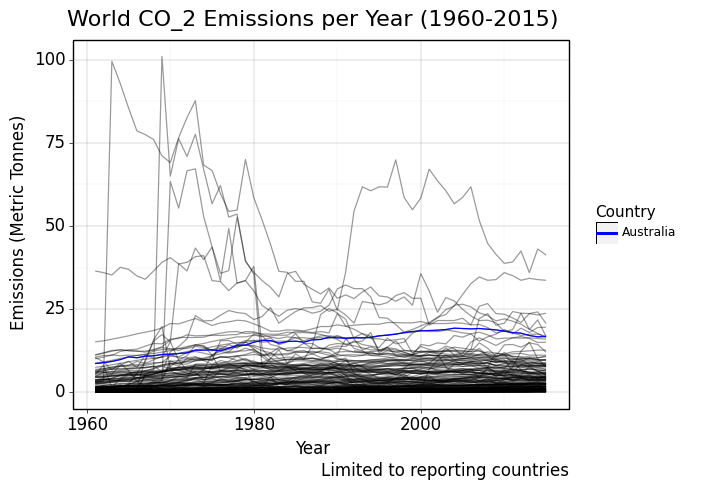

<ggplot: (8256999616687)>

In [ ]:
(
    ggplot(co2_emissions)
    +aes(x='Year',y='Value', group ='Country')
    +geom_line(alpha = 0.4)
    +labs(title = 'World CO_2 Emissions per Year (1960-2015)',
         caption = 'Limited to reporting countries',
         y = 'Emissions (Metric Tonnes)'
         )
    +theme_linedraw()
    +theme(axis_text_x = element_text(size = 12),
          axis_text_y = element_text(size = 12),
          axis_title_x = element_text(size = 12),
          axis_title_y = element_text(size = 12),
          plot_caption = element_text(size = 12),
          plot_title = element_text(size = 16)
          )
    + geom_line(co2_emissions[co2_emissions["Country"] == 'Australia'] ,aes(x = 'Year', y = 'Value', color = 'Country'))
    + scale_colour_manual(values = 'blue')
       )

In [ ]:
my_theme = (
    theme_linedraw()
    +theme(axis_text_x = element_text(size = 12),
          axis_text_y = element_text(size = 12),
          axis_title_x = element_text(size = 12),
          axis_title_y = element_text(size = 12),
          plot_caption = element_text(size = 12),
          plot_title = element_text(size = 16)
          )
)

In [ ]:
top_10_count = co2_emissions[co2_emissions['Year']== 2014].sort_values('Value',ascending=False).head(10)

In [ ]:
top_10_count

,Year,Country,Indicator,Value,region
7903,2014,Qatar,Emissions,43.1,Rest of the World
7925,2014,Trinidad and Tobago,Emissions,33.9,Rest of the World
7793,2014,UAE,Emissions,24.2,Rest of the World
7804,2014,Bahrain,Emissions,23.3,Rest of the World
7812,2014,Brunei,Emissions,21.8,Rest of the World
7906,2014,Saudi Arabia,Emissions,19.5,Rest of the World
7872,2014,Luxembourg,Emissions,17.7,Rest of the World
7929,2014,USA,Emissions,17.5,Rest of the World
7797,2014,Australia,Emissions,16.7,Australia
7815,2014,Canada,Emissions,16.2,Rest of the World


In [ ]:
Top10b = co2_emissions[co2_emissions['Country'].isin(top_10_count['Country'])]

/usr/local/lib/python3.10/dist-packages/plotnine/guides/guides.py:187: PlotnineWarning: Cannot generate legend for the 'fill' aesthetic. Make sure you have mapped a variable to it


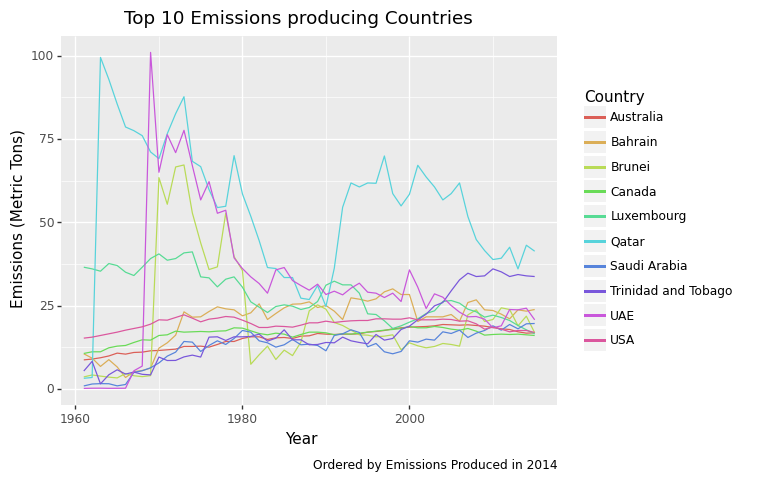

<ggplot: (8256999783382)>

In [ ]:
(
    ggplot(Top10b)
    + aes(x = 'Year', y = 'Value', color = 'Country')
    + geom_line()
    + scale_fill_cmap(cmap_name='viridis')
    + labs( title = "Top 10 Emissions producing Countries ",caption = "Ordered by Emissions Produced in 2014" ,y = "Emissions (Metric Tons)")
    )

### Tile plot:
Creating a geom_tile plot.

To do this plot I will reorder categorical variables based on top Co2 emission :

In [ ]:
Top10b['Country'] = pd.Categorical(Top10b['Country'],categories=top_10_count['Country'].values,ordered=True)

<ipython-input-494-2a6b2ba9a04f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


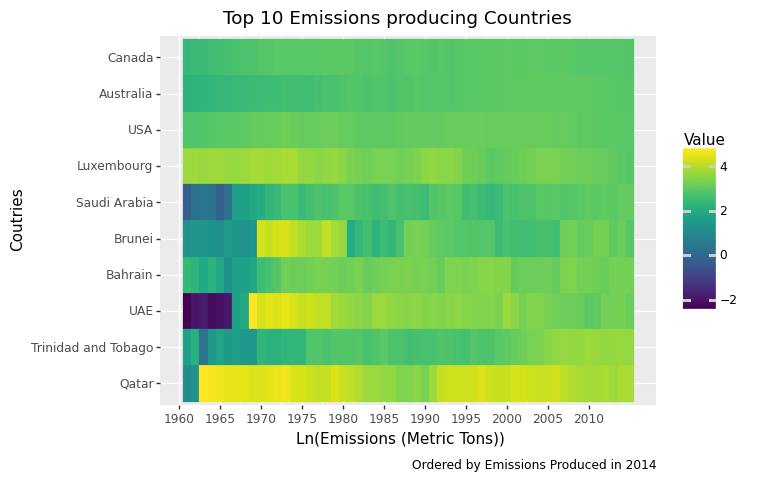

<ggplot: (8256999855050)>

In [ ]:
(
    ggplot(Top10b)
    + aes(x = 'Year', y = 'Country',color = np.log(Top10b['Value']))
    + geom_tile(aes(fill = np.log(Top10b['Value'])))
    + scale_x_continuous(breaks = range(1900, 2014, 5), labels = range(1900, 2014,5))
    + labs( title = "Top 10 Emissions producing Countries ",caption = "Ordered by Emissions Produced in 2014" ,x = "Ln(Emissions (Metric Tons))",y='Coutries')
    )

## Faceted plot:
The last facet figure, 3x2 figure shows all of the world and then just AUS :

In [ ]:
data_long

,Year,Country,Indicator,Value,region
0,1961,Angola,Emissions,0.0821,Rest of the World
1,1961,Albania,Emissions,1.3500,Rest of the World
2,1961,UAE,Emissions,0.1090,Rest of the World
3,1961,Argentina,Emissions,2.4600,Rest of the World
4,1961,Armenia,Emissions,3.8300,Rest of the World
...,...,...,...,...,...
24426,2017,Australia,Temperature,22.4900,Australia
24427,2018,Australia,Temperature,22.4900,Australia
24428,2019,Australia,Temperature,22.7900,Australia
24429,2020,Australia,Temperature,22.5700,Australia


In [ ]:
indicators = ['Emissions', 'GDP', 'Energy']
filter_condition = data_long['Indicator'].isin(indicators)
filtered_data = data_long[filter_condition]

In [ ]:
filtered_data

,Year,Country,Indicator,Value,region
0,1961,Angola,Emissions,0.0821,Rest of the World
1,1961,Albania,Emissions,1.3500,Rest of the World
2,1961,UAE,Emissions,0.1090,Rest of the World
3,1961,Argentina,Emissions,2.4600,Rest of the World
4,1961,Armenia,Emissions,3.8300,Rest of the World
...,...,...,...,...,...
24250,2015,Samoa,Energy,NaN,Rest of the World
24251,2015,Yemen,Energy,NaN,Rest of the World
24252,2015,South Africa,Energy,NaN,Rest of the World
24253,2015,Zambia,Energy,NaN,Rest of the World


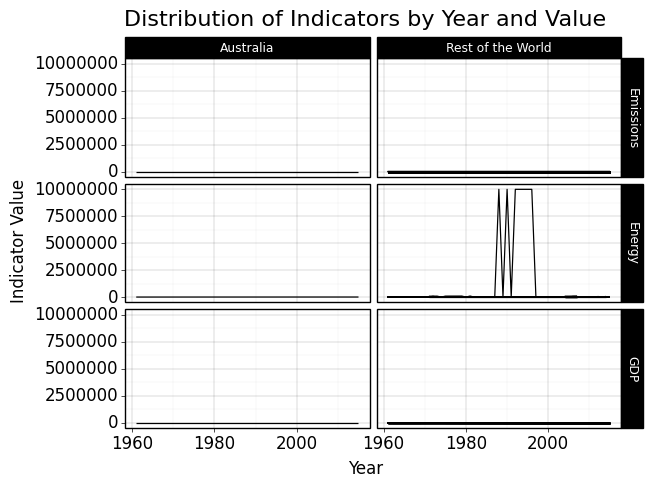

<ggplot: (8257000389461)>

In [ ]:
(
    ggplot(filtered_data,aes(x = 'Year', y = 'Value', group = 'Country'))
    + geom_line()
    +facet_grid('Indicator ~ region')
    + my_theme
    +scale_y_continuous(limits=(filtered_data['Value'].min(), filtered_data['Value'].max()))
    +labs(title = "Distribution of Indicators by Year and Value", y = "Indicator Value")
)

# Scatter plot:
Next, just looking at two of the variables: CO2 emissions and temperature. Using years between 1980 and 2014 (because we have values for all of those years for these two variables).

The datasets do not span the same amount of time, so I will limit the plot to only the years where the data overlaps for both CO2 emissions and temperature.

I will use the geom_point() function to create a scatter plot between the x and y variables, where x is time and y is one of the two variables
:

In [ ]:
CO2_temp_AUS = data_long[data_long['Country']=='Australia']

In [ ]:
CO2_temp_AUS = CO2_temp_AUS.pivot(index = 'Year',columns='Indicator', values='Value')

In [ ]:
CO2_temp_AUS

Indicator,Disasters,Emissions,Energy,GDP,Temperature
Year,,,,,
1901,NaN,NaN,NaN,NaN,21.53
1902,NaN,NaN,NaN,NaN,21.53
1903,NaN,NaN,NaN,NaN,21.18
1904,NaN,NaN,NaN,NaN,21.11
1905,NaN,NaN,NaN,NaN,21.19
...,...,...,...,...,...
2019,3.0,NaN,NaN,NaN,22.79
2020,3.0,NaN,NaN,NaN,22.57
2021,7.0,NaN,NaN,NaN,22.06


/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 68 rows containing missing values.


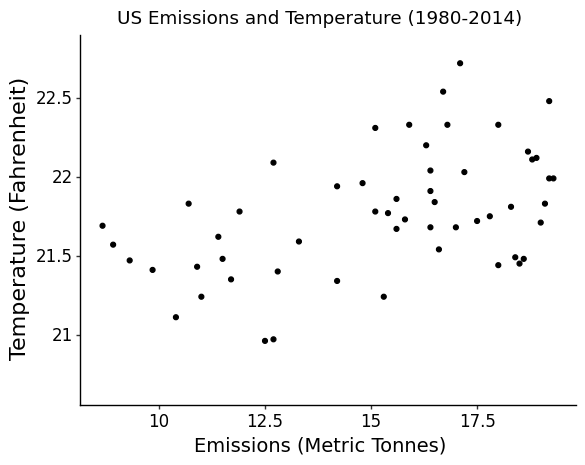

<ggplot: (8257000204829)>

In [ ]:
CO2_temp_AUS_plot = (
    ggplot(CO2_temp_AUS, aes(x='Emissions', y='Temperature'))
    +geom_point()
    +theme_classic()
    +theme(axis_text_x=element_text(size=12, color="black"),
          axis_text_y=element_text(size=12, color="black"),
          axis_title_x=element_text(size=14),
          axis_title_y=element_text(size=16))
    +labs(title="US Emissions and Temperature (1980-2014)",
         x="Emissions (Metric Tonnes)",
         y="Temperature (Fahrenheit)")
)
CO2_temp_AUS_plot

Adding a linear regression line:

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 68 rows containing missing values.


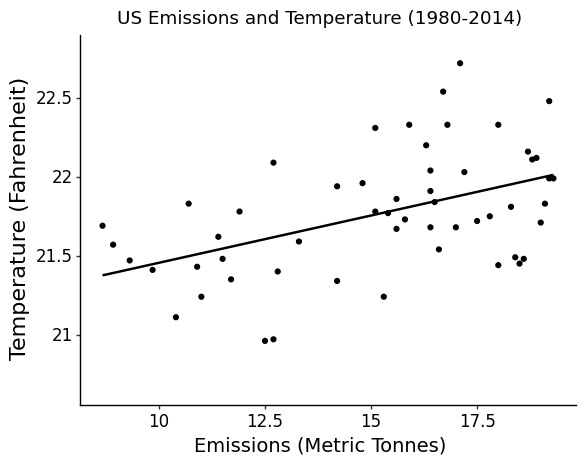

<ggplot: (8257000997321)>

In [ ]:
CO2_temp_AUS_plot = (
    CO2_temp_AUS_plot
    + geom_smooth(method = "lm", se = False)
)
CO2_temp_AUS_plot

This^ shows that there could be a relationship between the two variables/

# Data Analysis

Focusing on CO2 emissions and temperature:

In [ ]:
emissions_mean = CO2_temp_AUS['Emissions'].mean()
Temperature_mean = CO2_temp_AUS['Temperature'].mean()
emissions_std = CO2_temp_AUS['Emissions'].std()
Temperature_std = CO2_temp_AUS['Temperature'].std()

print("Emissions_mean :" + str(emissions_mean) + "\nTemperature_mean :" +str(Temperature_mean)+ "\nEmissions_std :" + str(emissions_std) + "\nTemperature_std :"+ str(Temperature_std))

Emissions_mean :15.235454545454546
Temperature_mean :21.583057851239666
Emissions_std :3.1055647892022247
Temperature_std :0.4515691954640073


On it's own, ^this doesn't show if there's a relationship between CO2 emissions and temperature because they're on different scales.



---



---



Calculating the Correlation Coefficient:

In [ ]:
CO2_temp_AUS[['Emissions','Temperature']].corr()

Indicator,Emissions,Temperature
Indicator,,
Emissions,1.00000,0.48274
Temperature,0.48274,1.00000


 Relationship between correlation and linear regression:

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 68 rows containing missing values.


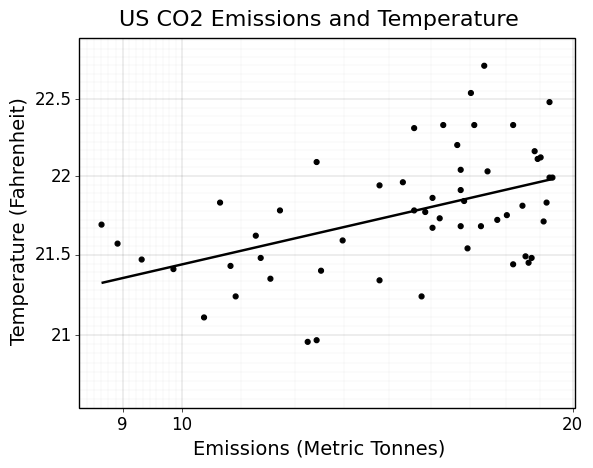

<ggplot: (8257000110435)>

In [ ]:
CO2_temp_US_scaled = (
    ggplot(CO2_temp_AUS, aes(x='Emissions', y='Temperature'))
    +geom_point()
    +geom_smooth(method="lm", se=False)
    +labs(title="US CO2 Emissions and Temperature",
         y="Temperature (Fahrenheit)",
         x="Emissions (Metric Tonnes)")
    +theme_linedraw()
    +scale_x_log10()
    +scale_y_log10()
    +theme(axis_text_x=element_text(size=12),
          axis_text_y=element_text(size=12),
          axis_title_x=element_text(size=14),
          axis_title_y=element_text(size=14),
          plot_caption=element_text(size=12),
          plot_title=element_text(size=16))
)

CO2_temp_US_scaled